```
學號：0716026
姓名：蕭楚澔
```

In [1]:
# Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

## Linear Regression

### Data Generation

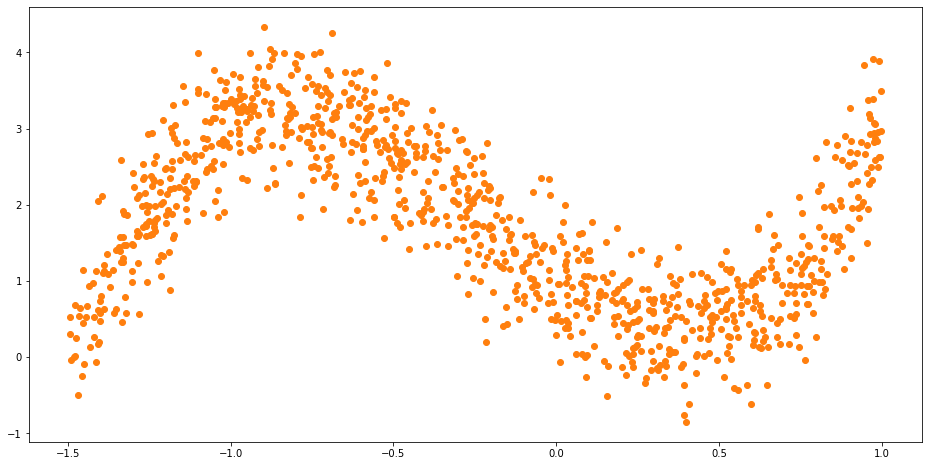

In [2]:
# 1. Data Generation

# Randomly generate 1000 (xi,yi) pairs which follow the equation
# yi=3x3i+2x2i−3xi+1+ϵi
X = np.random.uniform(-1.5, 1.0, size=(1000))
epslon = np.random.normal(0, 0.5, size=(1000))
Y = [(3*xi**3)+(2*xi**2)-(3*xi)+(1)+(ei) for xi, ei in zip(X, epslon)]
plt.figure(figsize=(16, 8))
plt.scatter(X, Y, c="C1")
plt.show()

### Data Preprocessing

In [3]:
# 2. Data Preprocessing

# Generate degree-K polynomial features x^ from x
# K = 1, 2, 3, 4
X = np.reshape(X, (-1, 1))
X_degree_K = [ [] for _ in range(5)]
for K in range(1, 5):
    poly = PolynomialFeatures(K)
    X_degree_K[K] = poly.fit_transform(X)

### Model Construction(linear regression)

In [4]:
# 3. Model Construction(linear regression)

def linear_reg(x_train, y_train, x_fit):
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    linear_reg_pre = reg.predict(xfit)
    return linear_reg_pre, reg.coef_, reg.intercept_

### Results

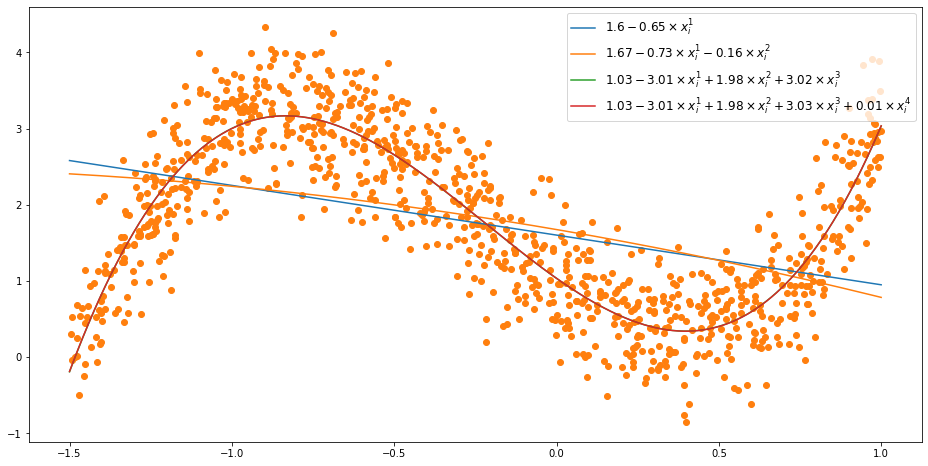

In [5]:
# 4. Results

def func_generate_linear(coef, const):
    result = str(np.around(const, 2))
    for i in range(1, len(coef)):
        if(coef[i]<0):
            result = result + str(np.around(coef[i], 2)) + " \\times " + "x_i^" + str(i)
        else:
            result = result + "+" + str(np.around(coef[i], 2)) + " \\times " + "x_i^" + str(i)
    return r'$' + result + '$'

plt.figure(figsize=(16, 8))
plt.scatter(X, Y, c="C1")
for K in range(1, 5):
    xfit_org = np.linspace(-1.5, 1.0, 1000)
    xfit = np.reshape(xfit_org, (-1, 1))
    poly = PolynomialFeatures(K)
    xfit = poly.fit_transform(xfit)
    yfit, reg_coef, constant = linear_reg(X_degree_K[K], Y, xfit)
    lab = func_generate_linear(reg_coef, constant)
    plt.plot(xfit_org, yfit, label=lab)
    
plt.legend(loc=1, prop={'size': 12})
plt.show()

## Logistic Regression

### Data Generation

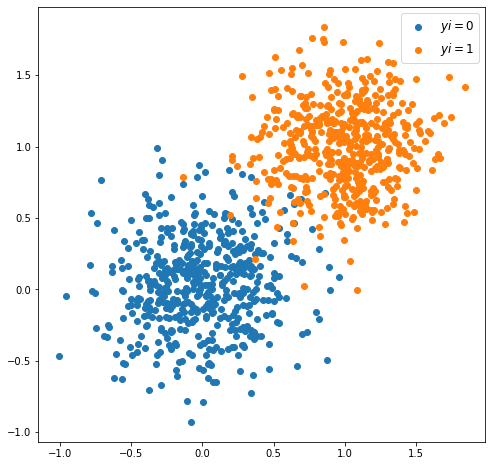

In [6]:
# 1. Data Generation

X = []
X_y0 = []
X_y1 = []
y = []

# Randomly generate 1000 (xi0,xi1,yi) triplets which follows [xi0xi1]∼N([yiyi],[0.1000.1])
# where yi is randomly assigned as 0 or 1

for k in range(0, 1000):
    yi = np.random.randint(0, 2)
    xi = np.random.multivariate_normal([yi, yi], [[0.1, 0], [0, 0.1]])
    X.append(xi)
    if(yi==0):
        X_y0.append(xi)
    else:
        X_y1.append(xi)
    y.append(yi)
    
X = np.array(X)
X_y0 = np.array(X_y0)
X_y1 = np.array(X_y1)
y = np.array(y)
plt.figure(figsize=(8, 8))
plt.scatter(X_y0[:, 0], X_y0[:, 1], c='C0', label=r'$yi=0$')
plt.scatter(X_y1[:, 0], X_y1[:, 1], c='C1', label=r'$yi=1$')
plt.legend(loc=1, prop={'size': 12})

plt.show()

### Model Construction(Logistic Regression)

In [7]:
# 2. Model Construction(Logistic Regression)

log_reg = LogisticRegression().fit(X, y)

### Results

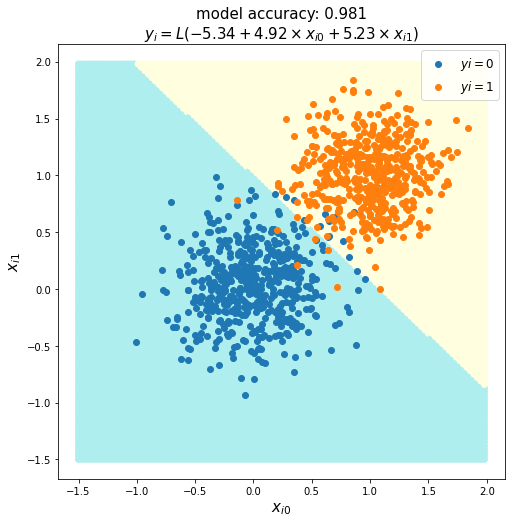

In [8]:
# 3. Results

plt.figure(figsize=(8, 8))
result = ""
result = "y_i = L(" + str(np.around(log_reg.intercept_[0], 2)) + " + " + str(np.around(log_reg.coef_[0][0], 2)) \
    + " \\times x_{i0} + " + str(np.around(log_reg.coef_[0][1], 2)) + " \\times x_{i1} )"
plt.title("model accuracy: " + str(log_reg.score(X, y)) + "\n" + r'$' + result + '$', fontsize=15)
l = [[x/100,y/100] for x in range(-150,200,3) for y in range(-150,200,3)]
pre = log_reg.predict(l)
l = np.array(l)
colors = np.where(pre[:]==0,'paleturquoise','lightyellow')
plt.scatter(l[:,0], l[:,1], c=colors)
plt.scatter(X_y0[:, 0], X_y0[:, 1], c='C0', label=r'$yi=0$')
plt.scatter(X_y1[:, 0], X_y1[:, 1], c='C1', label=r'$yi=1$')
plt.legend(loc=1, prop={'size': 12})
plt.xlabel(r"$ x_{i0}$", fontsize=15)
plt.ylabel(r"$ x_{i1}$", fontsize=15)
plt.show()